# Bike-sharing demand anaysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
df= pd.read_csv("C:/Users/Selam/Desktop/project/hour.csv")

In [2]:
df
df.head(5)
df.tail(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [3]:
#one way of checking if we have null value
missing_values= df.isnull()
for column in missing_values.columns.values.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print("")
# If the value of the column is true then it means the value is null.According to our result we don't have null value in the dataset.


instant
False    17379
Name: instant, dtype: int64

dteday
False    17379
Name: dteday, dtype: int64

season
False    17379
Name: season, dtype: int64

yr
False    17379
Name: yr, dtype: int64

mnth
False    17379
Name: mnth, dtype: int64

hr
False    17379
Name: hr, dtype: int64

holiday
False    17379
Name: holiday, dtype: int64

weekday
False    17379
Name: weekday, dtype: int64

workingday
False    17379
Name: workingday, dtype: int64

weathersit
False    17379
Name: weathersit, dtype: int64

temp
False    17379
Name: temp, dtype: int64

atemp
False    17379
Name: atemp, dtype: int64

hum
False    17379
Name: hum, dtype: int64

windspeed
False    17379
Name: windspeed, dtype: int64

casual
False    17379
Name: casual, dtype: int64

registered
False    17379
Name: registered, dtype: int64

cnt
False    17379
Name: cnt, dtype: int64



In [4]:
#another way of checking if we have null value
df.isna().sum(axis= 0)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
#checking if cnt is equal to the sum of casual and registered column
np.sum((df.casual + df.registered) != df.cnt)
# the value sum of casual and registered not equal to cnt is zero which means casual and registered is equal to cnt

0

In [7]:
#checking if month column have 1 to 12 value
np.unique(df.mnth)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [8]:
#checking if hour column 0 to 23
np.unique(df.hr)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [9]:
#The variables ‘casual’ and ‘registered’ are redundant and need to be dropped. 
#‘Instant’ is the index and needs to be dropped too. The date column dteday will not be used in the model building,
#and therefore needs to be dropped. Create a new dataframe named inp1.
inp1= df.drop(["casual","registered","instant","dteday"],axis=1).copy()
inp1
#another way of droping column
"""cols_to_drop = ['casual', 'registered', 'dteday', 'instant']
inp1 = inp0.drop(cols_to_drop, axis=1).copy()"""


"cols_to_drop = ['casual', 'registered', 'dteday', 'instant']\ninp1 = inp0.drop(cols_to_drop, axis=1).copy()"

In [10]:
inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


<AxesSubplot:xlabel='temp', ylabel='Density'>

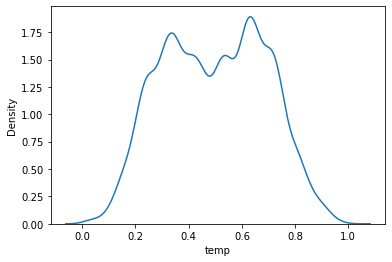

In [11]:
#Make density plot for temp. This would give a sense of the centrality and the spread of the distribution.

sns.kdeplot(inp1["temp"])

#Another way of ploting density plot
#inp1.temp.plot.density()

#It seems like temp have a normal distribution 

C:\Users\Selam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='atemp'>

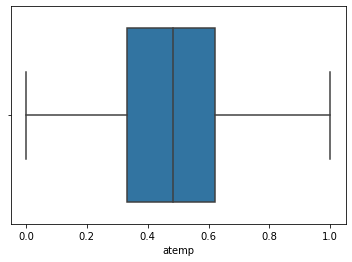

In [12]:
#Are there any outliers?
sns.boxplot(inp1.atemp)

#There are no outliers in atemp 

<AxesSubplot:ylabel='Frequency'>

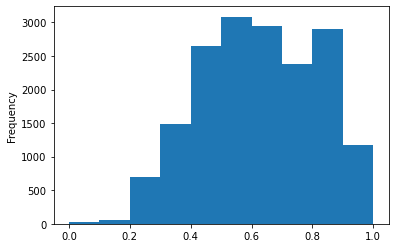

In [13]:
#Do you detect any abnormally high values?
inp1.hum.plot.hist()
#There don't seems to be abnormaly high value 

<AxesSubplot:ylabel='Density'>

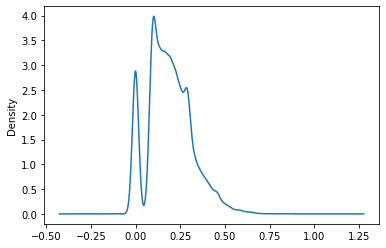

In [14]:
inp1.windspeed.plot.density()

C:\Users\Selam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

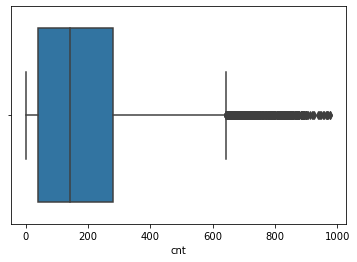

In [15]:
#Do you see any outliers in the boxplot? 

sns.boxplot(inp1.cnt)
#yes, there are outliers starting from 600 and above. 

<AxesSubplot:ylabel='Density'>

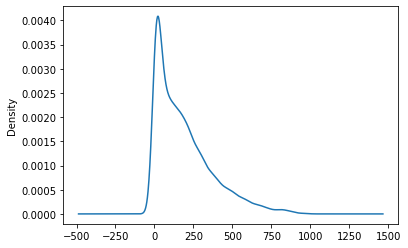

In [16]:
#Does the density plot provide a similar insight?
inp1.cnt.plot.density()
# yes, the density plot shows the outliers as well. 

In [17]:
#Outlier treatment
inp1.cnt.quantile([0.1,0.25,0.50,0.75,0.90,0.95,0.99])

0.10      9.00
0.25     40.00
0.50    142.00
0.75    281.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

In [18]:
# cutting the count dataset at the 95 percentile which is 563 to treat the outliers. 
inp2= inp1[inp1.cnt < 563].copy()

<AxesSubplot:ylabel='Density'>

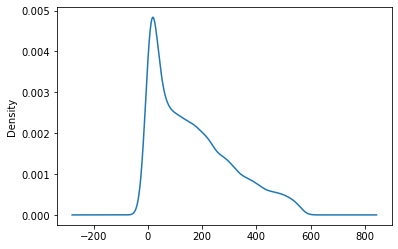

In [19]:
inp2.cnt.plot.density()

C:\Users\Selam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

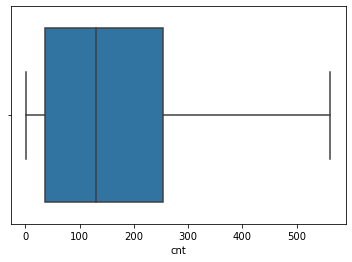

In [20]:
sns.boxplot(inp2.cnt)

C:\Users\Selam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hr', ylabel='cnt'>

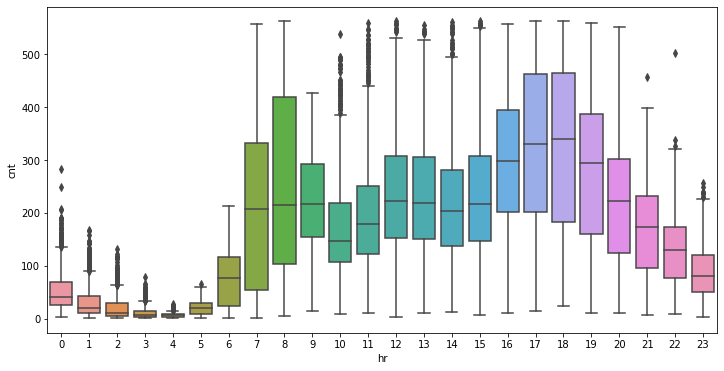

In [21]:
plt.figure(figsize= [12,6])
sns.boxplot("hr","cnt",data= inp2)
#What kind of pattern do you see from this boxplot
#It seems that there is more demand from 7am to 8am and 5pm to 6pm

C:\Users\Selam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='cnt'>

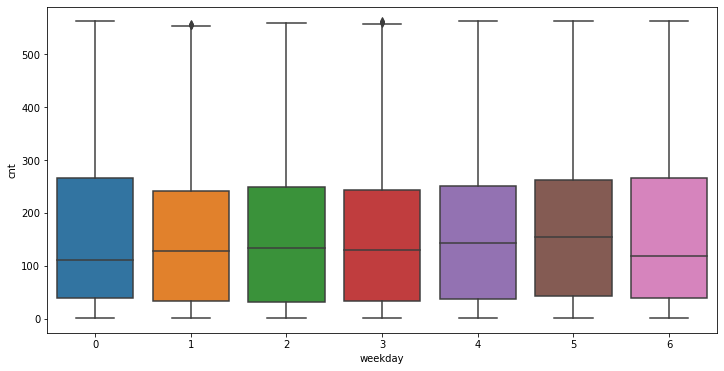

In [22]:
plt.figure(figsize= [12,6])
sns.boxplot("weekday","cnt", data= inp2)
#What kind of pattern do you see?
#Demand is higher on Saturday, Sunday and Monday.

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

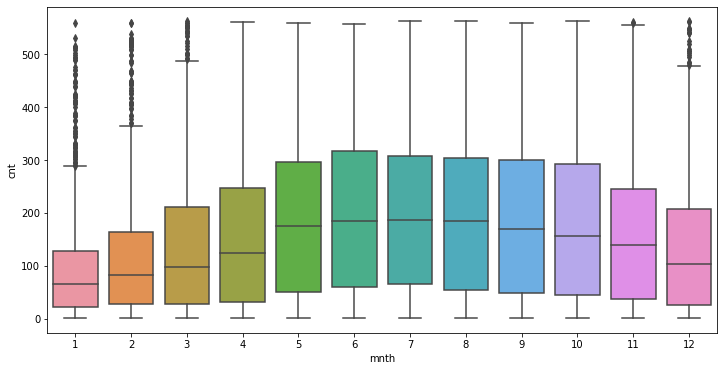

In [23]:
plt.figure(figsize=[12,6])
sns.boxplot(x="mnth",y="cnt",data= inp2)
#What kind of pattern do you see?
#It seems the there is more demand during summer season

<AxesSubplot:xlabel='season', ylabel='cnt'>

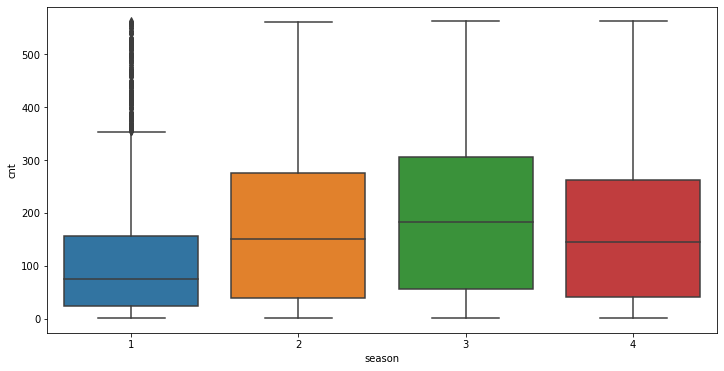

In [24]:
plt.figure(figsize= [12,6])
sns.boxplot(x= "season",y="cnt", data= inp2)
#It seems there is more demand in the fall. From the previous box plot it seems like the summer had the highest count of rides but from this box plot fall has the highest count.

<BarContainer object of 24 artists>

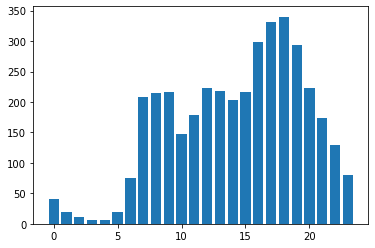

In [25]:
#Make a bar plot with the median value of cnt for each hr


inp2_group = inp2[['hr','cnt']]
inp2_group = inp2_group.groupby(['hr'],as_index=False).median()
inp2_group
plt.bar(inp2_group.hr,inp2_group.cnt)

#Does this paint a different picture from the box plot of hr and cnt?
#It shows similar pattern though in this bar plot it is more clear. There is high demand of bikes 7am to 9am and 4pm to 7pm.

In [26]:
#Make a correlation matrix for variables atemp, temp, hum, and windspeed
inp2[["atemp","temp","hum","windspeed"]].corr()

#Which variables have the highest correlation?
#atemp and temp have the highest correlation
    


,atemp,temp,hum,windspeed
atemp,1.000000,0.988218,-0.025747,-0.073985
temp,0.988218,1.000000,-0.042603,-0.033209
hum,-0.025747,-0.042603,1.000000,-0.288648
windspeed,-0.073985,-0.033209,-0.288648,1.000000


In [27]:
#Treating mnth column
#For values 5,6,7,8,9,10, replace with a single value 5. This is because these have very similar values for cnt.

inp3= inp2.copy()
inp3["mnth"] = inp3["mnth"].replace([5,6,7,8,9,10], 5)
  


In [28]:
#check
np.unique(inp3.mnth)


array([ 1,  2,  3,  4,  5, 11, 12], dtype=int64)

In [29]:
#Treating hr column
#Create new mapping: 0-5: 0, 11-15: 11; other values are untouched.
#Again, the bucketing is done in a way that hr values with similar levels of cnt are treated the same.
inp3['hr']= inp3['hr'].replace([0,1,2,3,4,5],0)
inp3['hr']= inp3['hr'].replace([11,12,13,14,15],11)



In [30]:
#check
np.unique(inp3.hr)

array([ 0,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype=int64)

In [31]:
#Get dummy columns for season, weathersit, weekday, mnth, and hr. 
#You needn’t club these further as the levels seem to have different values for the median cnt,
#when seen from the box plots.

colnames= ["season","weathersit","weekday","mnth","hr"]
inp3= pd.get_dummies(inp3, columns= colnames,drop_first=True)

inp3



,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,hr_10,hr_11,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0,0,0,0.24,0.2879,0.81,0.0000,16,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0000,40,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0000,32,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0000,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,0.26,0.2576,0.60,0.1642,119,0,0,...,0,0,0,0,0,1,0,0,0,0
17375,1,0,1,0.26,0.2576,0.60,0.1642,89,0,0,...,0,0,0,0,0,0,1,0,0,0
17376,1,0,1,0.26,0.2576,0.60,0.1642,90,0,0,...,0,0,0,0,0,0,0,1,0,0
17377,1,0,1,0.26,0.2727,0.56,0.1343,61,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
#Train test split: Apply 70-30 split.
#call the new dataframes df_train and df_test
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(inp3, train_size = 0.7, random_state = 100)

y_train = df_train.pop("cnt")
x_train = df_train

y_test = df_test.pop("cnt")
x_test = df_test

y_train.dtypes
x_train.dtypes
x_test.dtypes
x_train.dtypes





yr                int64
holiday           int64
workingday        int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
season_2          uint8
season_3          uint8
season_4          uint8
weathersit_2      uint8
weathersit_3      uint8
weathersit_4      uint8
weekday_1         uint8
weekday_2         uint8
weekday_3         uint8
weekday_4         uint8
weekday_5         uint8
weekday_6         uint8
mnth_2            uint8
mnth_3            uint8
mnth_4            uint8
mnth_5            uint8
mnth_11           uint8
mnth_12           uint8
hr_6              uint8
hr_7              uint8
hr_8              uint8
hr_9              uint8
hr_10             uint8
hr_11             uint8
hr_16             uint8
hr_17             uint8
hr_18             uint8
hr_19             uint8
hr_20             uint8
hr_21             uint8
hr_22             uint8
hr_23             uint8
dtype: object

In [33]:
model= LinearRegression()
model.fit(x_train,y_train)

y_train_pred= model.predict(x_train)
r2_score(y_train, y_train_pred)



0.6700766417146999

In [34]:
y_test_pred=model.predict(x_test)
r2_score(y_test,y_test_pred)

0.6644475404107738

In [ ]:
We can say that ~ 66.44% of the variation of the cnt is explained by this simple linear model 
